In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

from astropy.table import Table
from astropy import units as u
import astropy.constants
from astropy.io import ascii,fits


from telfit import TelluricFitter, DataStructures
from telfit import Modeler


from scipy.optimize import curve_fit
from astropy import  convolution


DEIMOS_DATA = '/Users/tac1998/thesis/'
#DEIMOS_REDUX = '/Users/mgeha/Projects/DEIMOS/'
#_SPEED_OF_LIGHT =astropy.constants.c.to_value('km/s') 

/Users/tac1998/anaconda/lib/python3.6/site-packages/pysynphot/locations.py:47: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/Users/tac1998/anaconda/lib/python3.6/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [17]:
path_tellurics = DEIMOS_DATA + '/tellurics/*.dat'
tellurics = glob.glob(path_tellurics)

tel_spectra = []

for name in tellurics[:5]:
    df = pd.read_csv(name, sep='\s\s+')
#     df['S/N'] = df['FLUX'] * np.sqrt(df['IVAR'])
#     ivar = df['IVAR']
#     df['VAR'] = np.sqrt(1/(ivar))
    tel_spectra.append(df)

/Users/tac1998/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [13]:
tel_spectra[0]

array([[             nan,              nan],
       [  6.20000000e+03,   9.99940000e-01],
       [  6.20001000e+03,   9.99940000e-01],
       ..., 
       [  9.49998000e+03,   7.12100000e-03],
       [  9.49999000e+03,   7.12100000e-03],
       [  9.50000000e+03,   7.12100000e-03]])

In [5]:
one = tel_spectra[0]

In [ ]:
'telluric_0.01A_h2o_15_o2_0.80_.dat'

In [7]:
import scipy.ndimage as scipynd

los_pix = 0.48150225395976343

smooth_tflux = scipynd.gaussian_filter1d(one['flux'],los_pix)

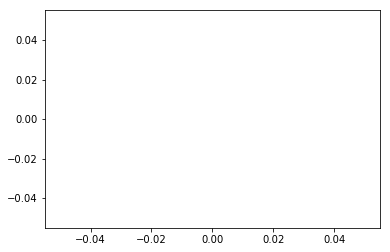

In [9]:
plt.plot(one['wave'],smooth_tflux)

In [10]:
one

,wave,flux
#,35.000000,140000.0
6200.000000,0.999940,NaN
6200.010000,0.999940,NaN
6200.020000,0.999940,NaN
6200.030000,0.999940,NaN
6200.040000,0.999940,NaN
6200.050000,0.999940,NaN
6200.060000,0.999940,NaN
6200.070000,0.999940,NaN
6200.080000,0.999940,NaN
